<a href="https://colab.research.google.com/github/emilymacris/ds3001group/blob/main/michigan/MI_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!git clone https://github.com/emilymacris/ds3001group.git


fatal: destination path 'ds3001group' already exists and is not an empty directory.


In [10]:
#importing files for demographics
rawdemo2012 = pd.read_excel("https://raw.githubusercontent.com/emilymacris/ds3001group/main/dataverse_files/demographicsallstates2012.xlsx")
rawdemo2016 = pd.read_excel("https://raw.githubusercontent.com/emilymacris/ds3001group/main/dataverse_files/demographicsallstates2016.xlsx")
rawdemo2020 = pd.read_excel("https://raw.githubusercontent.com/emilymacris/ds3001group/main/dataverse_files/demographicsallstates2020.xlsx")


rawdemo2012 = rawdemo2012[rawdemo2012["State Name"] == "Michigan"]
rawdemo2016 = rawdemo2020[rawdemo2016["State Name"] == "Michigan"]
rawdemo2020 = rawdemo2020[rawdemo2020["State Name"] == "Michigan"]



In [11]:
# sorting MI poverty
mipoverty = pd.read_csv("https://raw.githubusercontent.com/emilymacris/ds3001group/main/michigan/mipoverty.csv")
mipoverty = mipoverty.drop([0,1, 38, 39])

mipoverty2012 = mipoverty[mipoverty['Year'] == 2012]
mipoverty2016 = mipoverty[mipoverty['Year'] == 2016]
mipoverty2020 = mipoverty[mipoverty['Year'] == 2020]

mipoverty2012.head(5)


,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1
170,2012,0,United States,"306,086,063","48,760,123","48,528,543 to 48,991,703",15.9,15.8 to 16.0
171,2012,26000,Michigan,"9,663,758","1,677,776","1,655,746 to 1,699,806",17.4,17.2 to 17.6
172,2012,26001,Alcona County,"10,508","1,677","1,335 to 2,019",16.0,12.7 to 19.3
173,2012,26003,Alger County,"8,542","1,345","1,070 to 1,620",15.7,12.5 to 18.9
174,2012,26005,Allegan County,"110,841","14,806","12,760 to 16,852",13.4,11.6 to 15.2


In [12]:
outcomes = pd.read_excel("https://raw.githubusercontent.com/emilymacris/ds3001group/main/michigan/michiganoutcomes.xlsx")

outcomes2012 = outcomes [outcomes ['year'] == 2012]
outcomes2016 = outcomes [outcomes [ 'year']== 2016]
outcomes2020 = outcomes [outcomes [ 'year'] == 2020]

In [13]:
# Merge 2012

election2012 = pd.merge(rawdemo2012, mipoverty2012, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2012 = pd.merge(election2012, outcomes2012, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012



In [14]:
#Merge 2016
election2016 = pd.merge(rawdemo2016, mipoverty2016, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2016 = pd.merge(election2016, outcomes2016, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012


In [15]:
# Merge 2020

election2020 = pd.merge(rawdemo2020, mipoverty2020, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2020 = pd.merge(election2020, outcomes2020, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012
election2020.head(10)

,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,County Subdivision Code,...,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,G2600010,2016-2020,MI,NaN,NaN,Michigan,26.0,Alcona County,1.0,NaN,...,MI,ALCONA,26001.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,4848.0,7064.0,20220315.0,TOTAL
1,G2600030,2016-2020,MI,NaN,NaN,Michigan,26.0,Alger County,3.0,NaN,...,MI,ALGER,26003.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3014.0,5128.0,20220315.0,TOTAL
2,G2600050,2016-2020,MI,NaN,NaN,Michigan,26.0,Allegan County,5.0,NaN,...,MI,ALLEGAN,26005.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,41392.0,67094.0,20220315.0,TOTAL
3,G2600070,2016-2020,MI,NaN,NaN,Michigan,26.0,Alpena County,7.0,NaN,...,MI,ALPENA,26007.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,10686.0,16969.0,20220315.0,TOTAL
4,G2600090,2016-2020,MI,NaN,NaN,Michigan,26.0,Antrim County,9.0,NaN,...,MI,ANTRIM,26009.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,9748.0,15949.0,20220315.0,TOTAL
5,G2600110,2016-2020,MI,NaN,NaN,Michigan,26.0,Arenac County,11.0,NaN,...,MI,ARENAC,26011.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5928.0,8831.0,20220315.0,TOTAL
6,G2600130,2016-2020,MI,NaN,NaN,Michigan,26.0,Baraga County,13.0,NaN,...,MI,BARAGA,26013.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2512.0,4038.0,20220315.0,TOTAL
7,G2600150,2016-2020,MI,NaN,NaN,Michigan,26.0,Barry County,15.0,NaN,...,MI,BARRY,26015.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,23471.0,35905.0,20220315.0,TOTAL
8,G2600170,2016-2020,MI,NaN,NaN,Michigan,26.0,Bay County,17.0,NaN,...,MI,BAY,26017.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,33125.0,60255.0,20220315.0,TOTAL
9,G2600190,2016-2020,MI,NaN,NaN,Michigan,26.0,Benzie County,19.0,NaN,...,MI,BENZIE,26019.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,6601.0,12262.0,20220315.0,TOTAL


In [16]:
election2012['Percent in Poverty'].unique()
election2016['Percent in Poverty'].unique()
election2020['Percent in Poverty'].unique()


array([14. , 12.1,  7.3, 15.6, 11.3, 12.8, 12.7,  7.6,  9.5, 15.1, 14.1,
       11.1,  8.7, 13.9, 18. ,  7.9, 13.6,  9.7,  7.8, 18.3, 16.6, 12.5,
       13.7, 12.6, 15. , 11.6, 13.8,  9.6, 14.2,  nan, 12. , 11.2, 19.2,
        8.2,  7.4,  5.3, 19.1,  9.2, 12.4, 12.3, 11.4, 10.1, 13.1, 15.5,
       13.3, 14.7,  9.3,  6.7, 15.8, 15.9, 13. , 15.3, 11.9, 20. ])

In [17]:
election2012['Percent in Poverty'].value_counts()
election2016['Percent in Poverty'].value_counts()
election2020['Percent in Poverty'].value_counts()
election2012['Percent in Poverty'].isnull().sum() # No missing values
election2016['Percent in Poverty'].isnull().sum() # No missing values
election2020['Percent in Poverty'].isnull().sum() # FOUR missing values, test in next row



4

In [18]:
# display the four rows in election2020 for which there are missing values
missing_poverty_rows = election2020[election2020['Percent in Poverty'].isnull()]
display(missing_poverty_rows.style)


Text(0.5, 1.0, 'Election 2020')

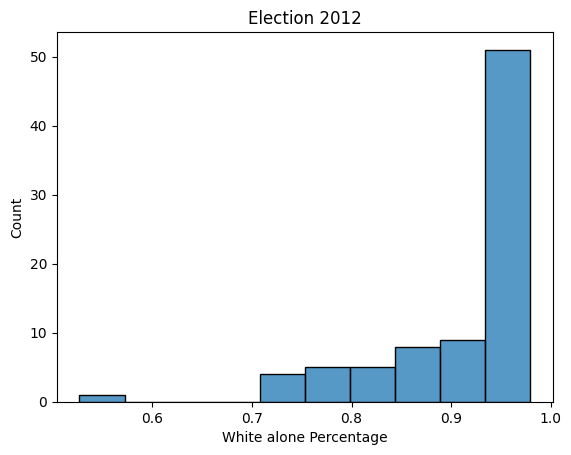

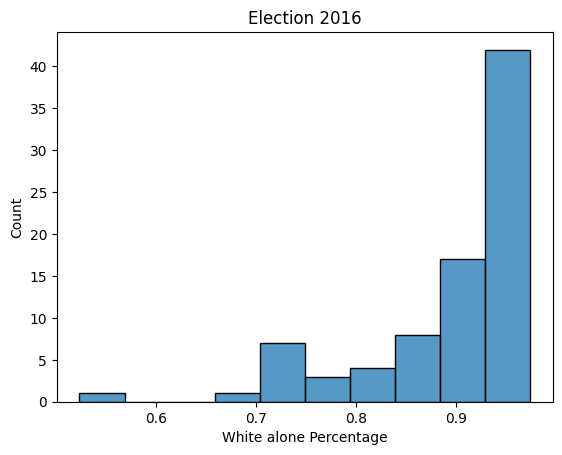

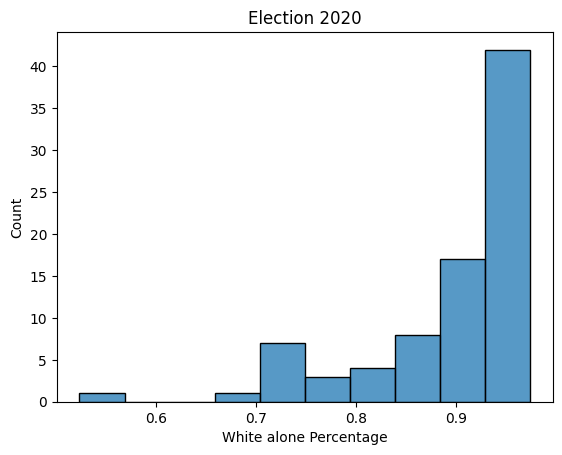

In [23]:
sns.histplot(election2012['White alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['White alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['White alone Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of White people
plt.title('Election 2020')


<Axes: title={'center': 'White alone Percentage'}, xlabel='party'>

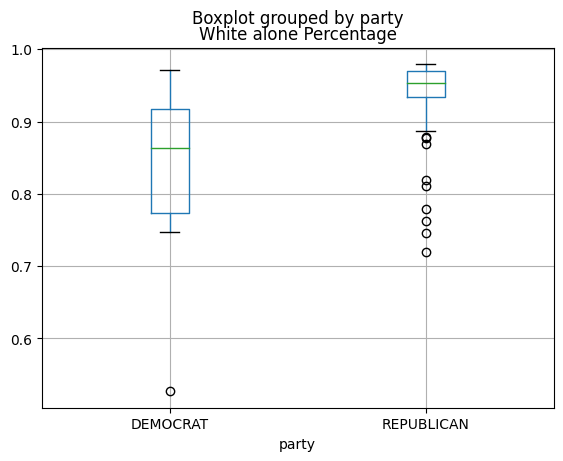

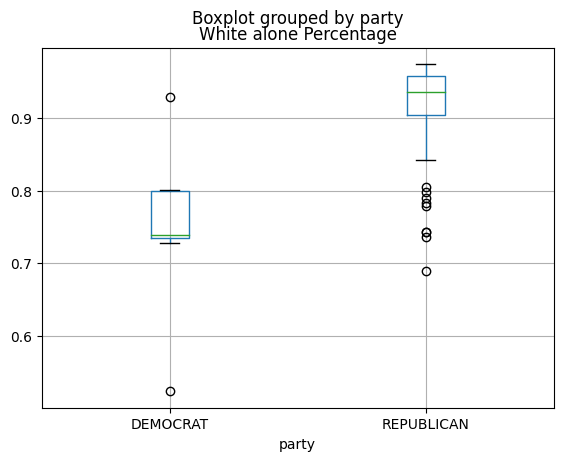

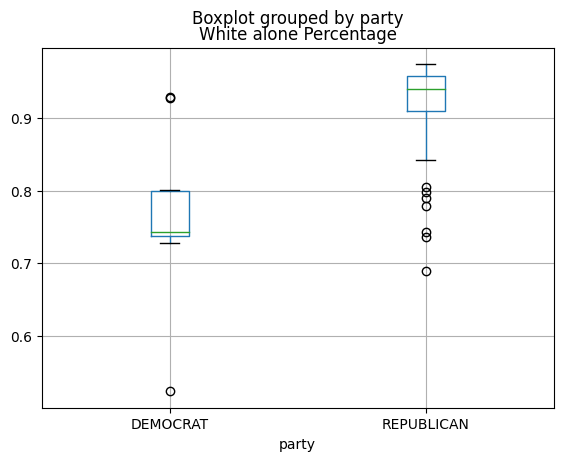

In [24]:

election2012.boxplot(column = 'White alone Percentage',by = 'party')
election2016.boxplot(column = 'White alone Percentage',by = 'party')
election2020.boxplot(column = 'White alone Percentage',by = 'party') # Boxplot of White people by voted party



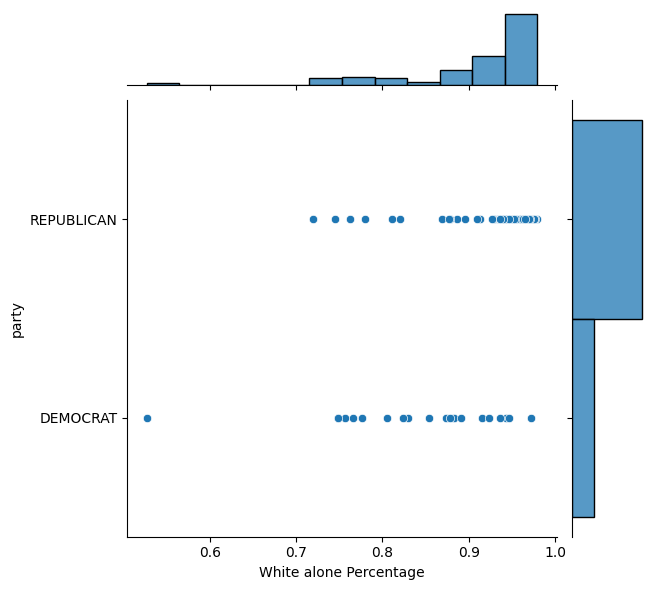

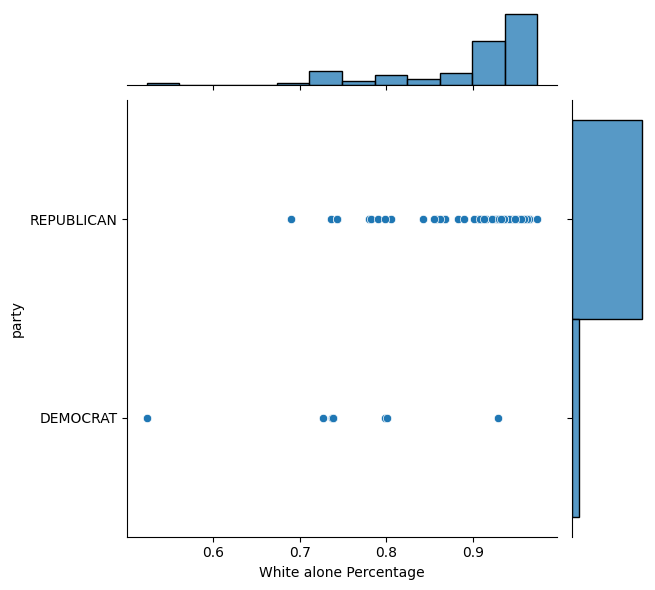

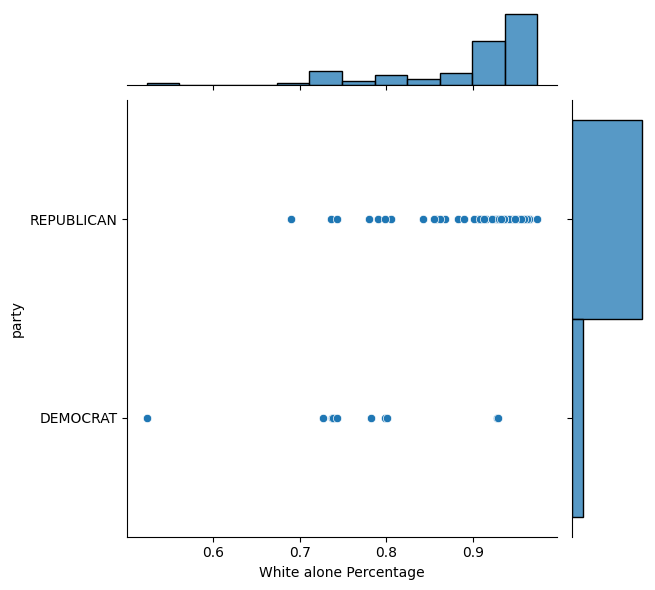

In [25]:
sns.jointplot(x=election2012['White alone Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['White alone Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['White alone Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


Text(0.5, 1.0, 'Election 2020')

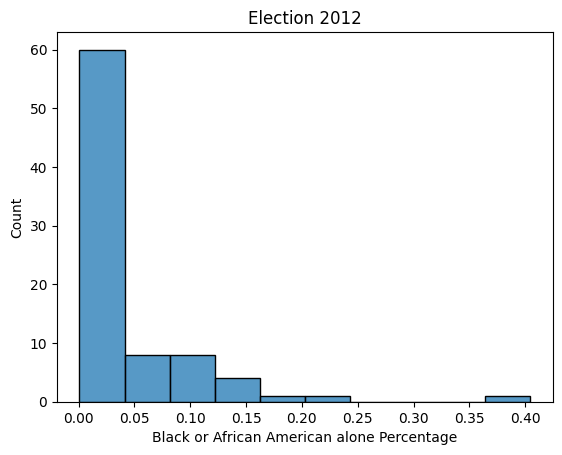

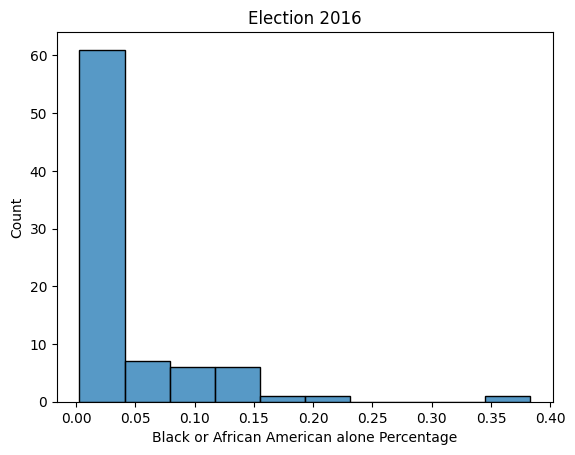

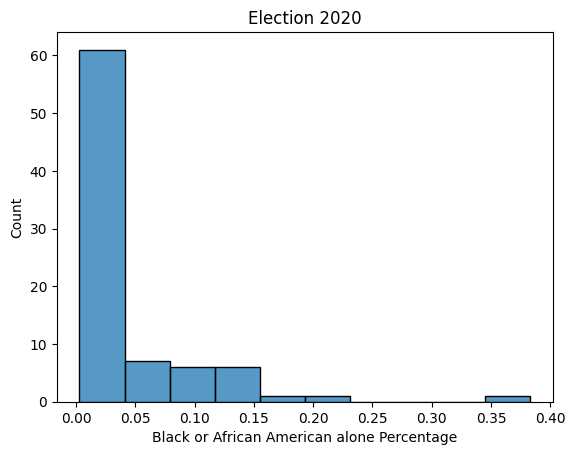

In [26]:

sns.histplot(election2012['Black or African American alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Black or African American alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Black or African American alone Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of Black people
plt.title('Election 2020')


<Axes: title={'center': 'Black or African American alone Percentage'}, xlabel='party'>

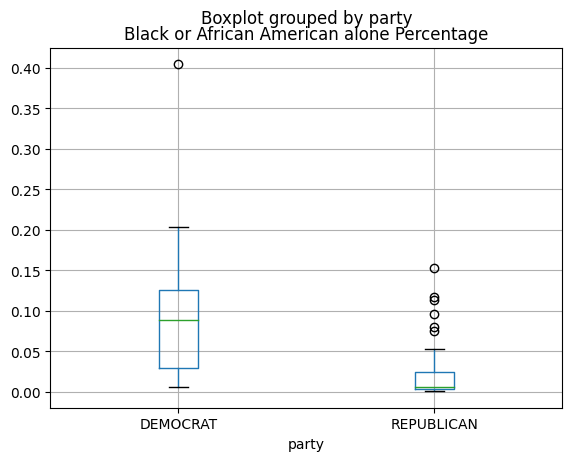

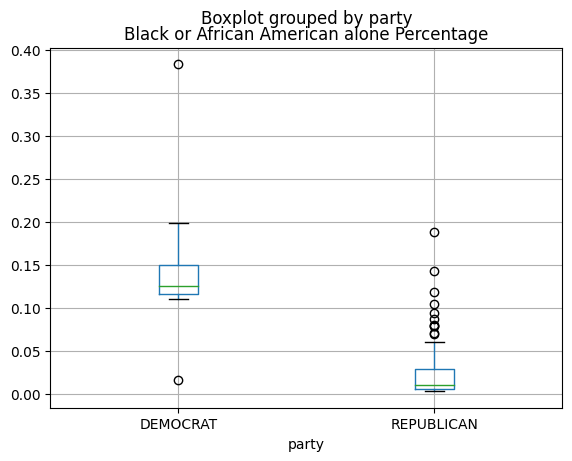

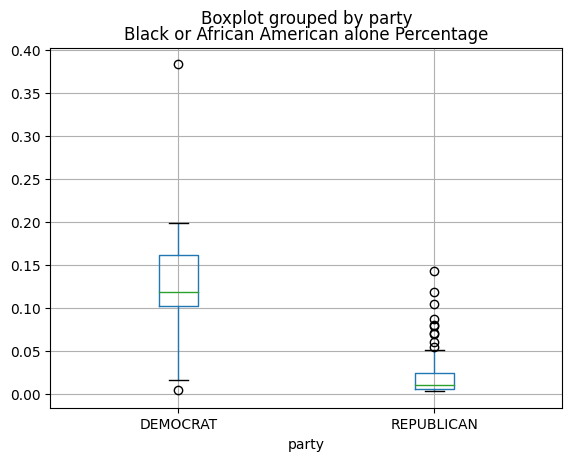

In [27]:

election2012.boxplot(column = 'Black or African American alone Percentage',by = 'party')
election2016.boxplot(column = 'Black or African American alone Percentage',by = 'party')
election2020.boxplot(column = 'Black or African American alone Percentage',by = 'party') # Boxplot of Black people by voted party

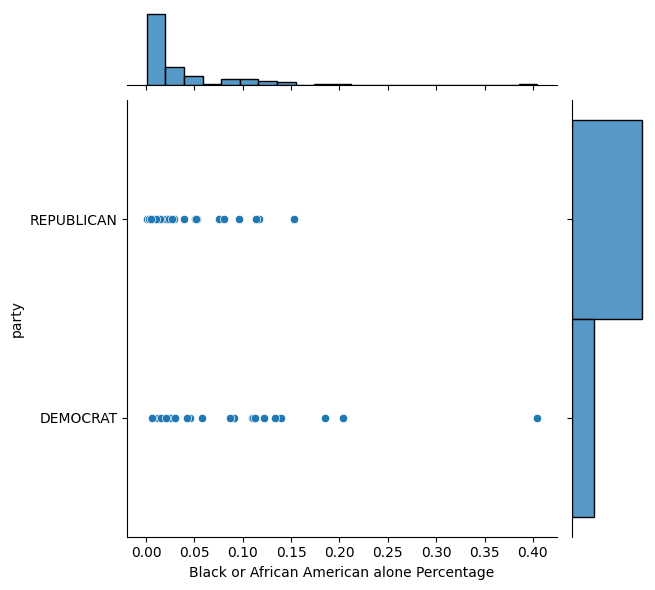

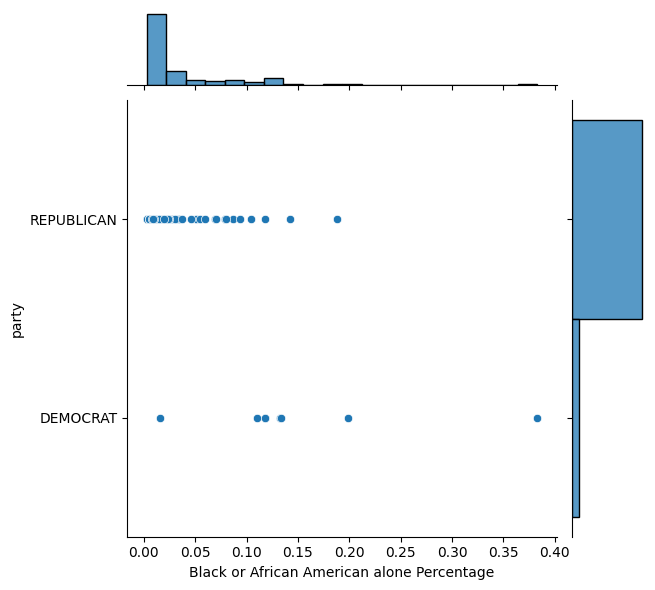

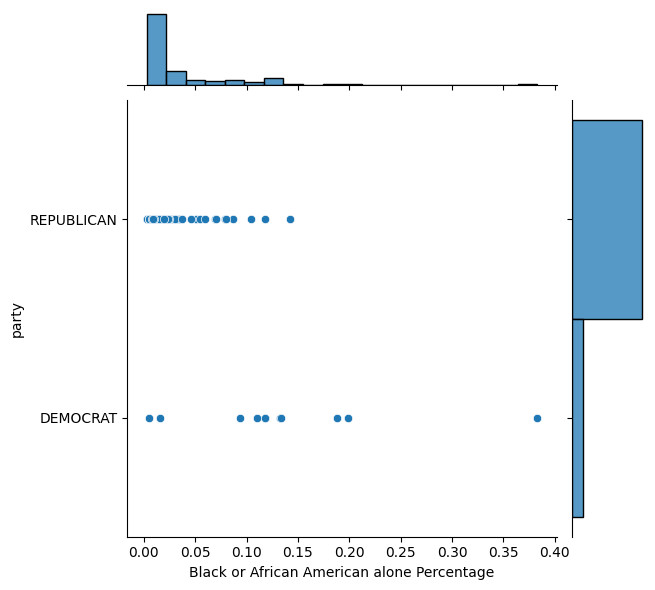

In [28]:

sns.jointplot(x=election2012['Black or African American alone Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Black or African American alone Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Black or African American alone Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

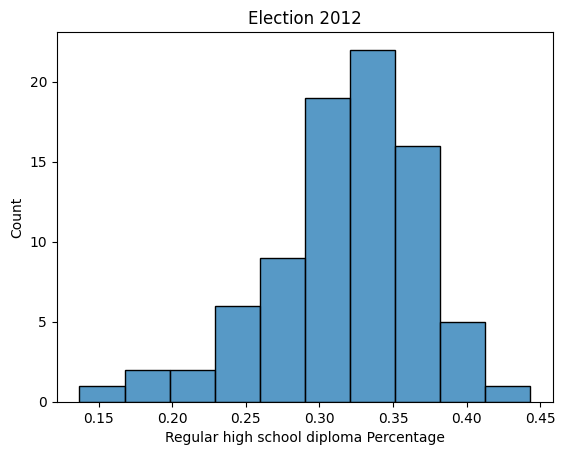

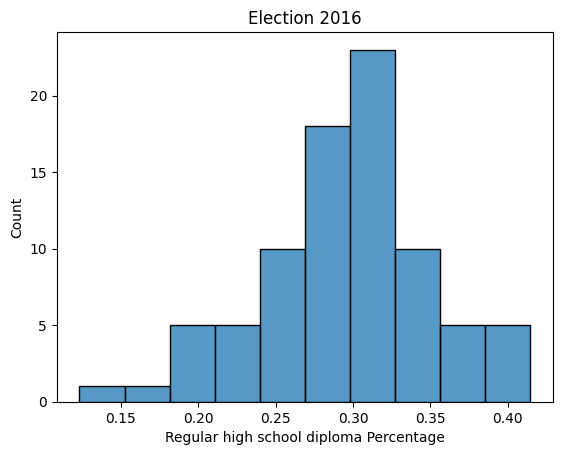

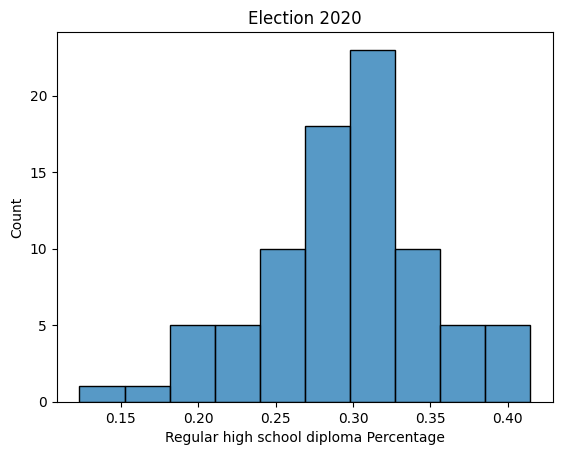

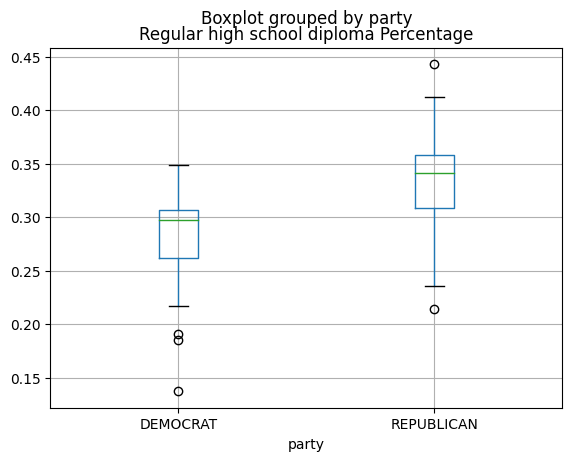

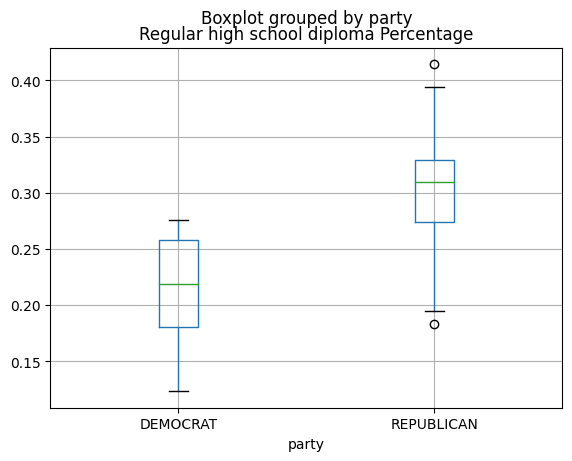

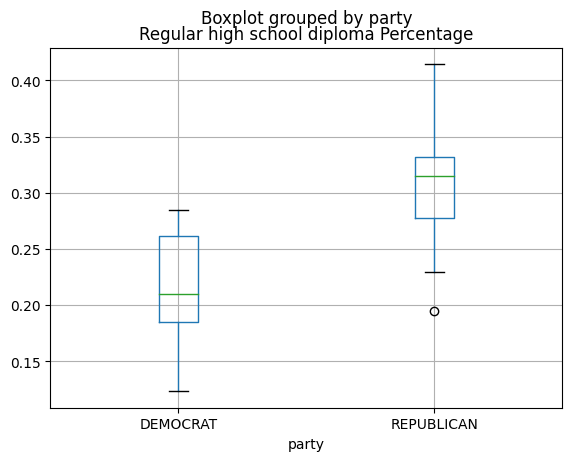

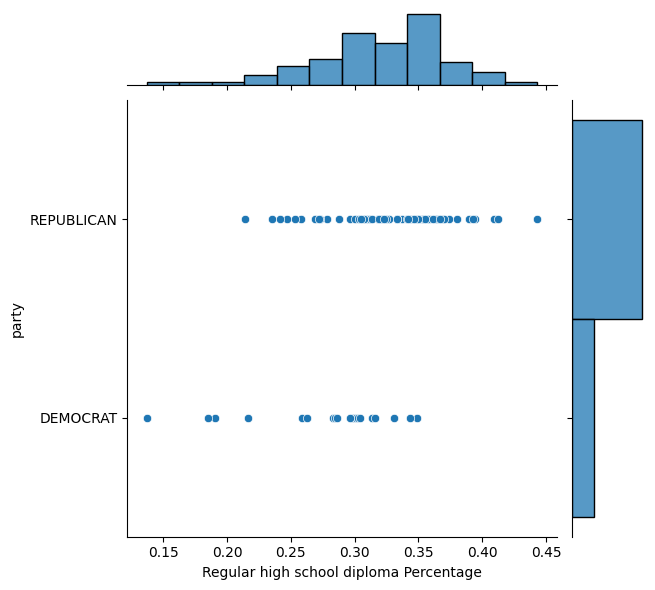

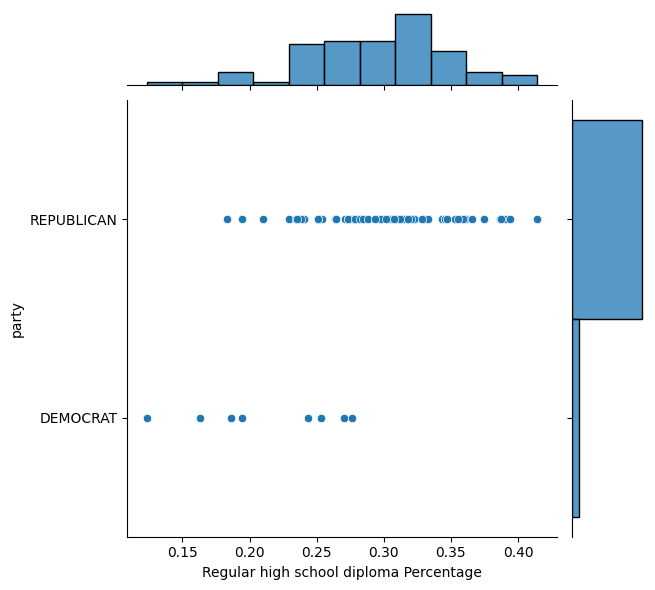

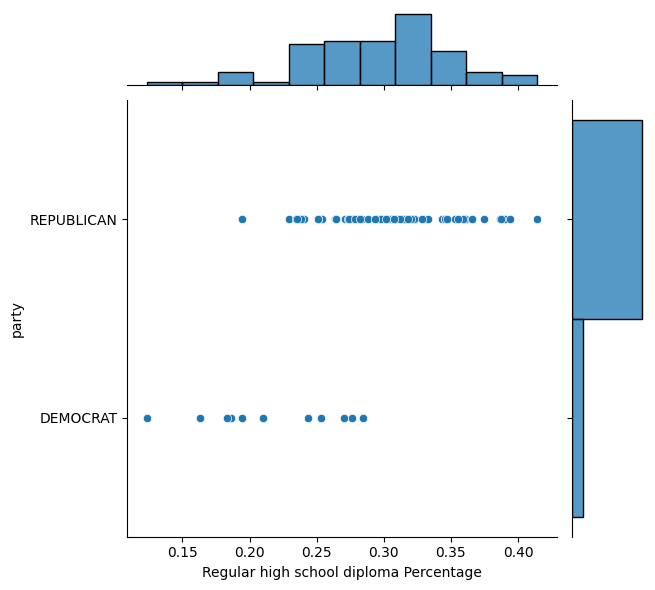

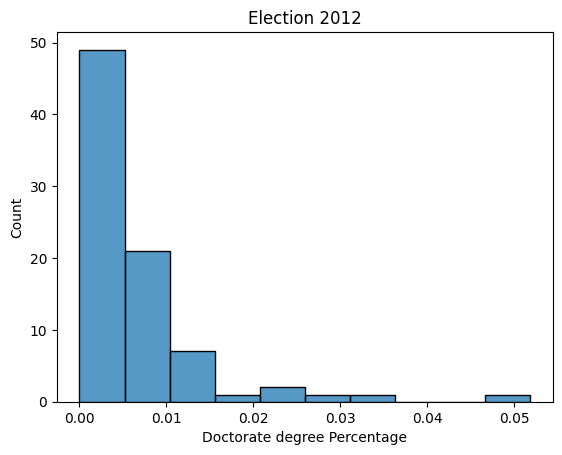

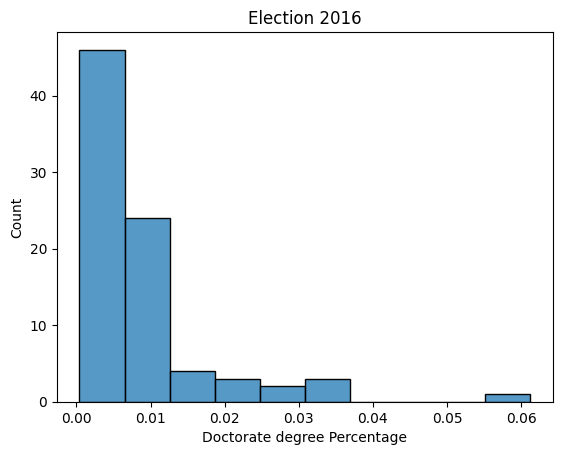

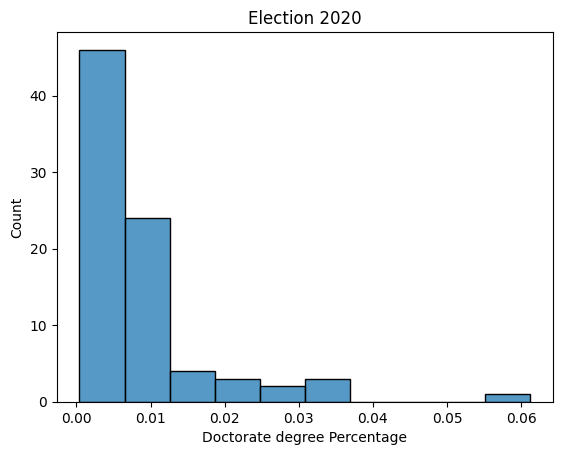

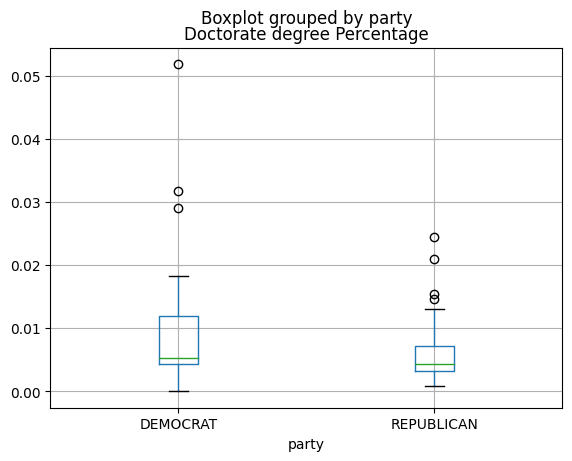

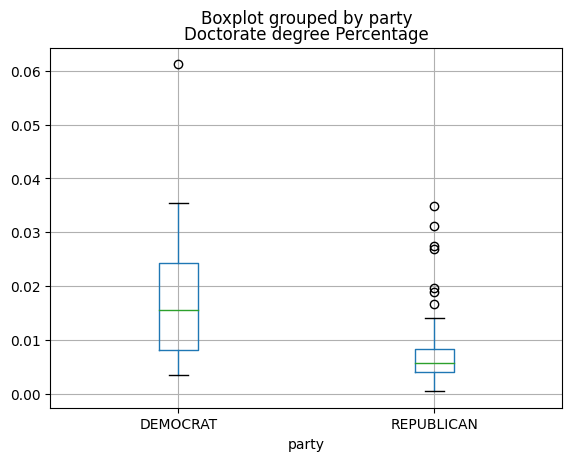

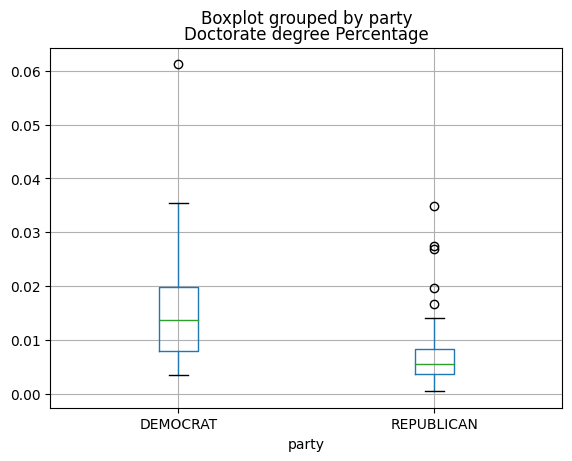

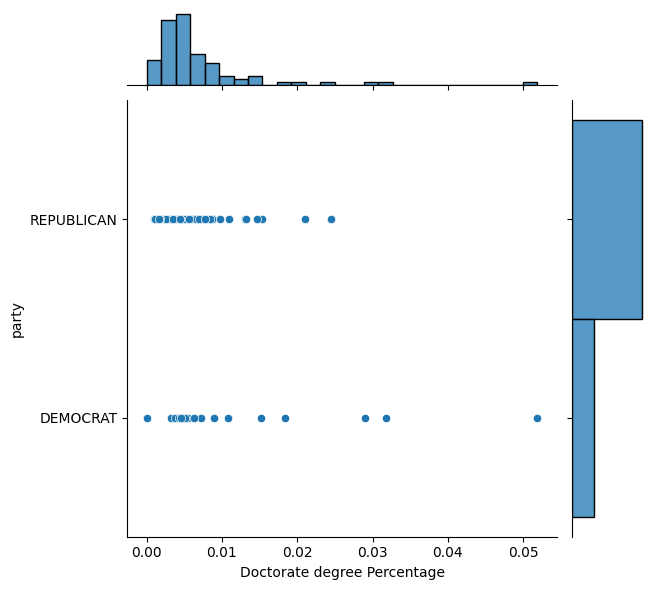

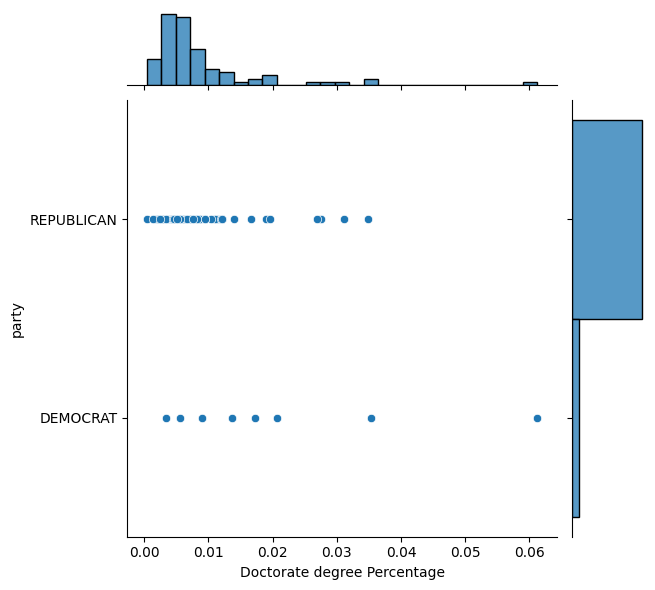

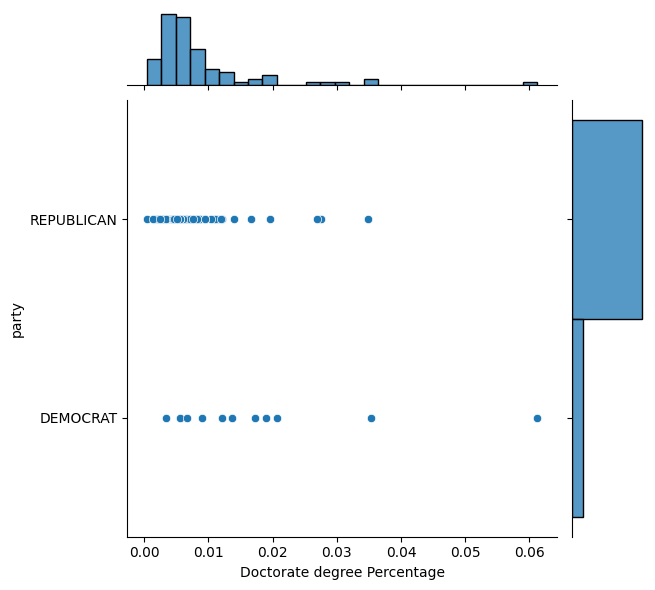

In [20]:
# EDA - Education

sns.histplot(election2012['Regular high school diploma Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Regular high school diploma Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Regular high school diploma Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')

election2012.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
election2016.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
election2020.boxplot(column = 'Regular high school diploma Percentage',by = 'party') # Boxplot of high school graduates by voted party

sns.jointplot(x=election2012['Regular high school diploma Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Regular high school diploma Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Regular high school diploma Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['Doctorate degree Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Doctorate degree Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Doctorate degree Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of those with a doctorate
plt.title('Election 2020')

election2012.boxplot(column = 'Doctorate degree Percentage',by = 'party')
election2016.boxplot(column = 'Doctorate degree Percentage',by = 'party')
election2020.boxplot(column = 'Doctorate degree Percentage',by = 'party') # Boxplot of proportion of doctors by voted party

sns.jointplot(x=election2012['Doctorate degree Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Doctorate degree Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Doctorate degree Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


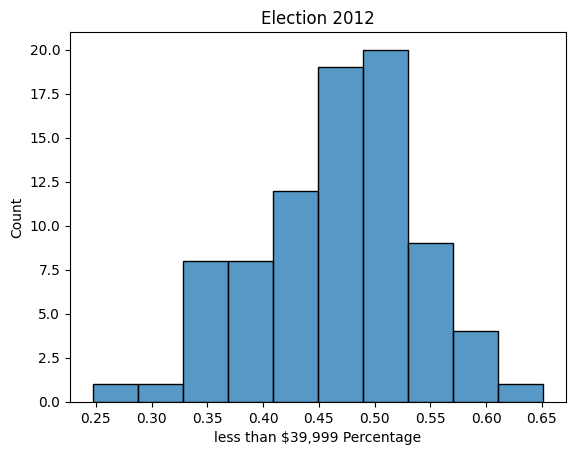

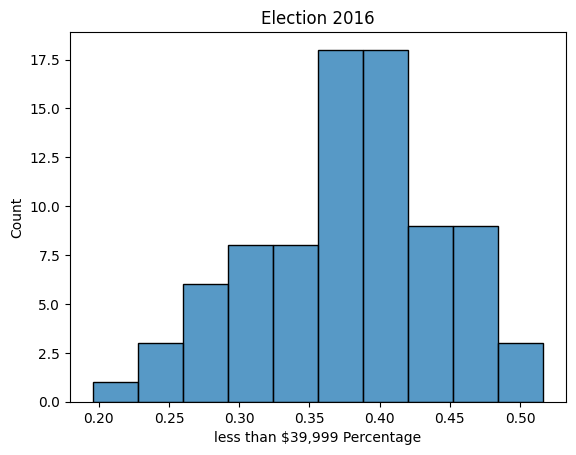

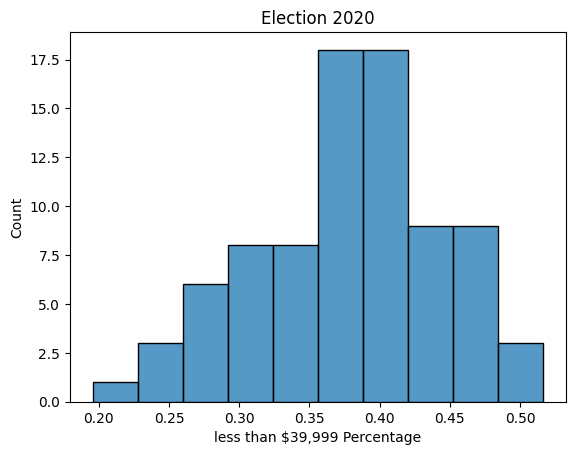

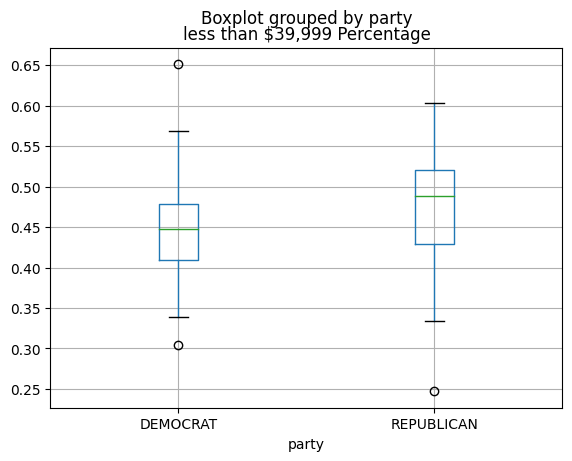

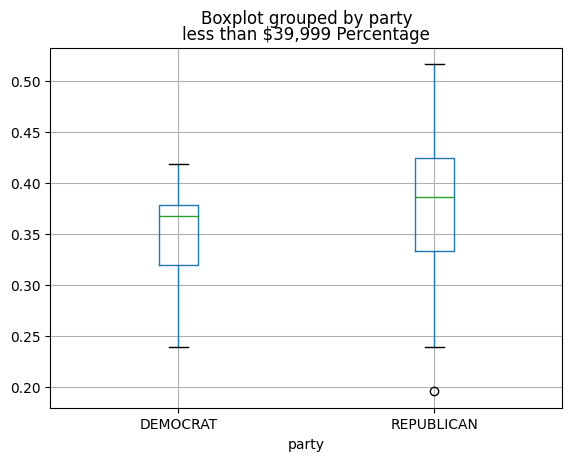

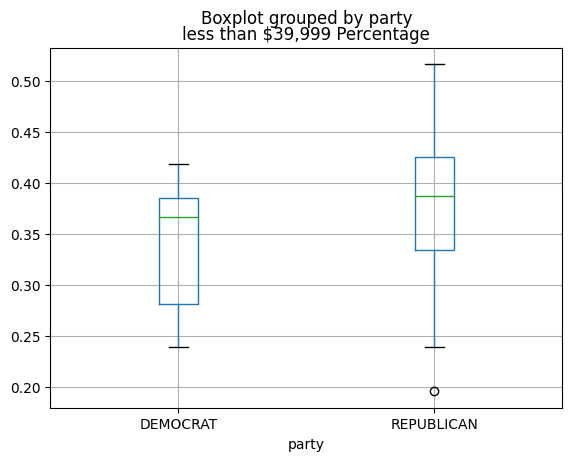

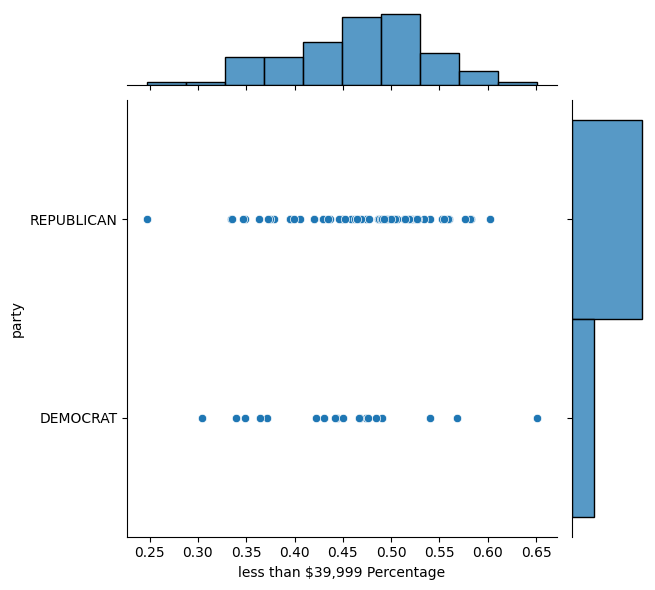

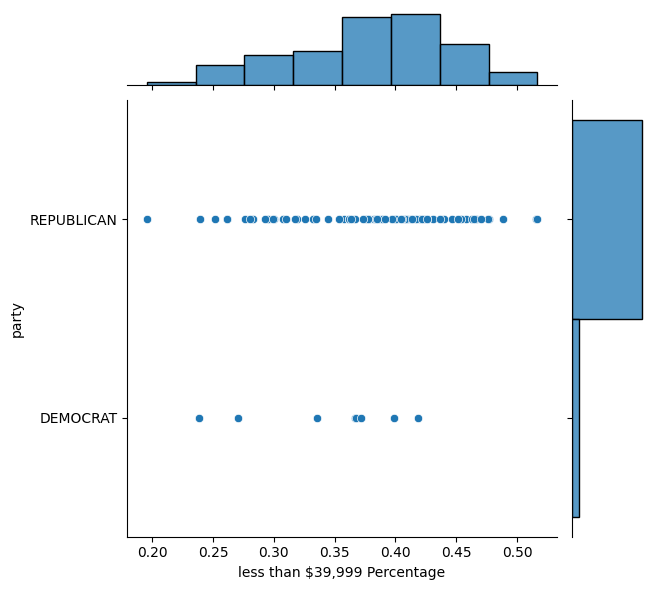

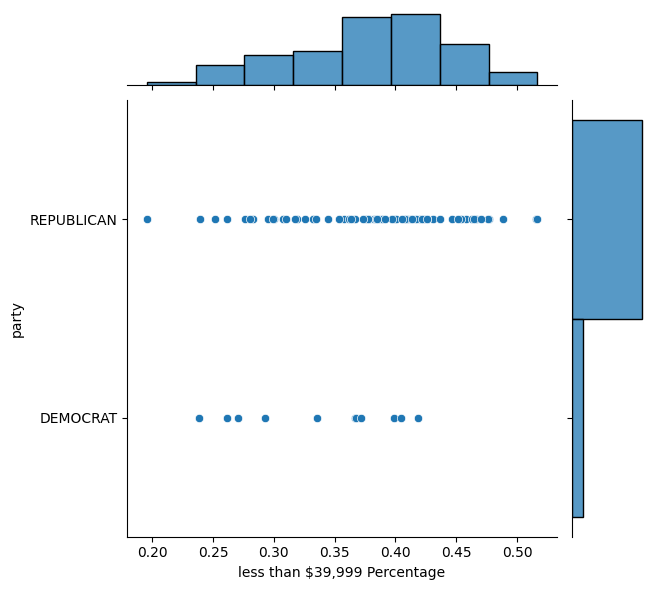

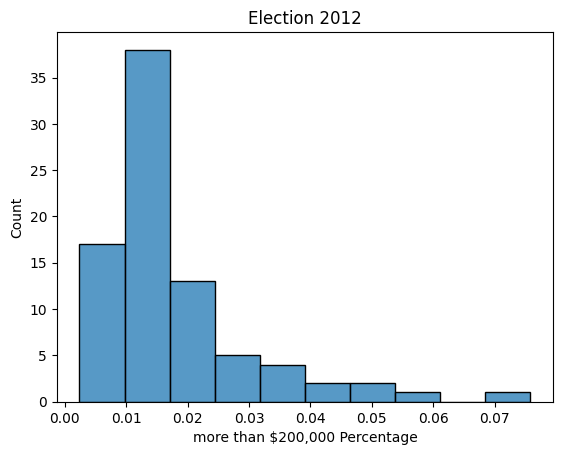

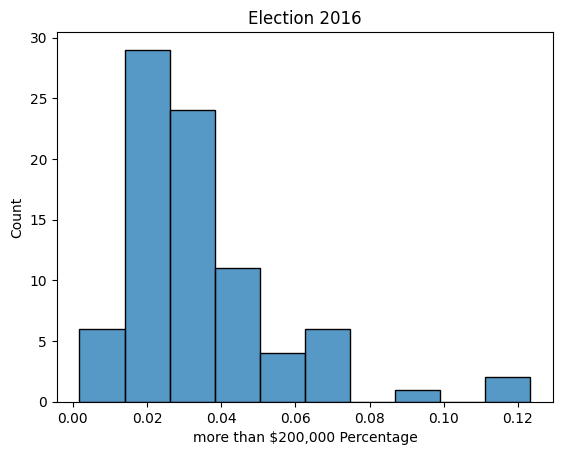

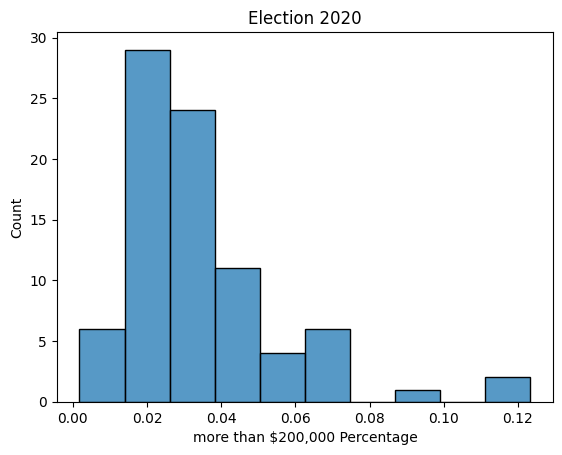

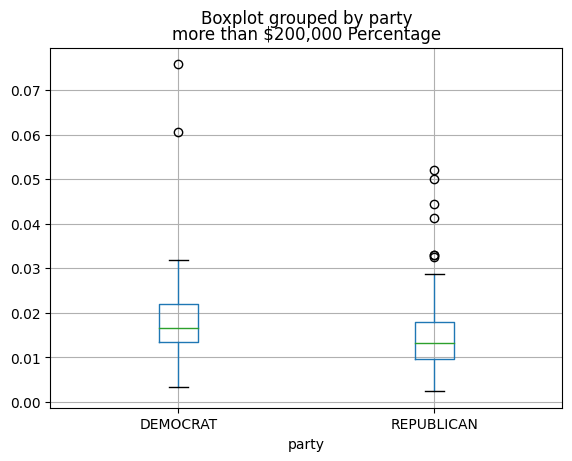

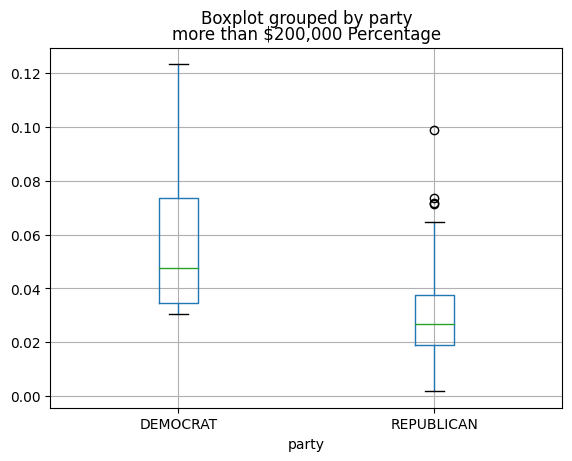

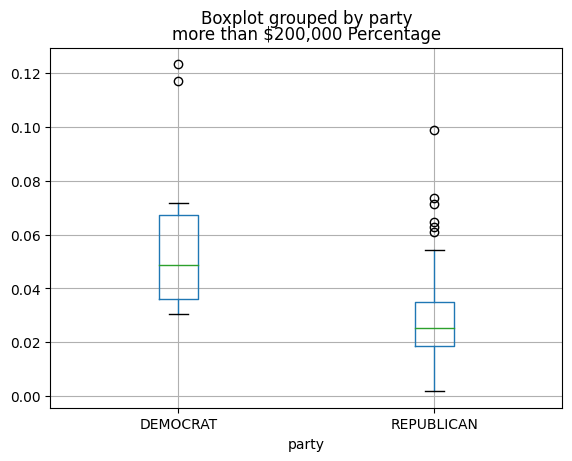

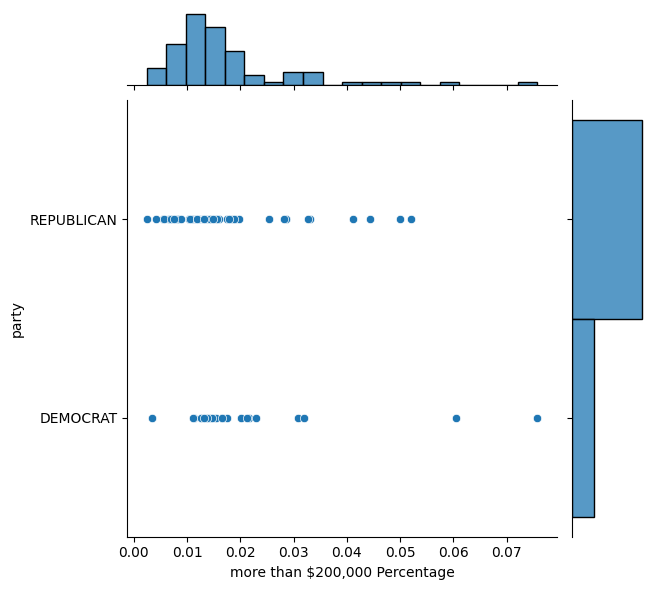

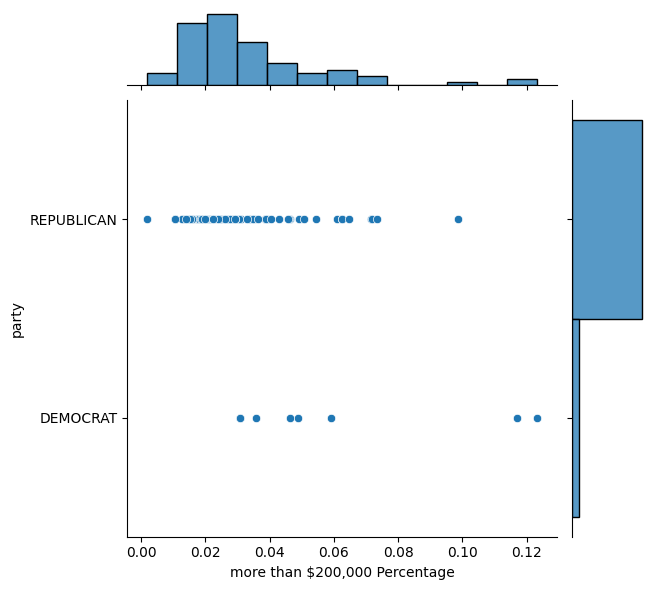

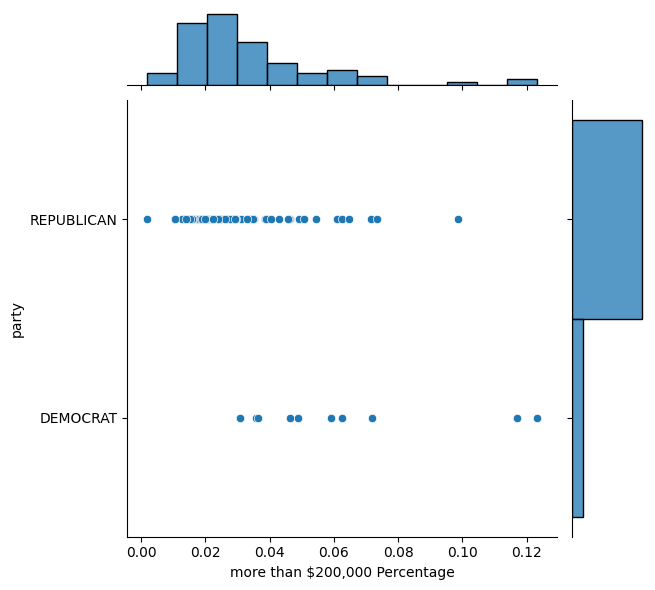

In [21]:
# EDA - Economic status

sns.histplot(election2012['less than $39,999 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['less than $39,999 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['less than $39,999 Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of incomes under $40k
plt.title('Election 2020')

election2012.boxplot(column = 'less than $39,999 Percentage',by = 'party')
election2016.boxplot(column = 'less than $39,999 Percentage',by = 'party')
election2020.boxplot(column = 'less than $39,999 Percentage',by = 'party') # Boxplot of proportion earning under $40k by voted party

sns.jointplot(x=election2012['less than $39,999 Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['less than $39,999 Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['less than $39,999 Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['more than $200,000 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['more than $200,000 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['more than $200,000 Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of incomes over $200k
plt.title('Election 2020')

election2012.boxplot(column = 'more than $200,000 Percentage',by = 'party')
election2016.boxplot(column = 'more than $200,000 Percentage',by = 'party')
election2020.boxplot(column = 'more than $200,000 Percentage',by = 'party') # Boxplot of proportion earning over $200k by voted party

sns.jointplot(x=election2012['more than $200,000 Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['more than $200,000 Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['more than $200,000 Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


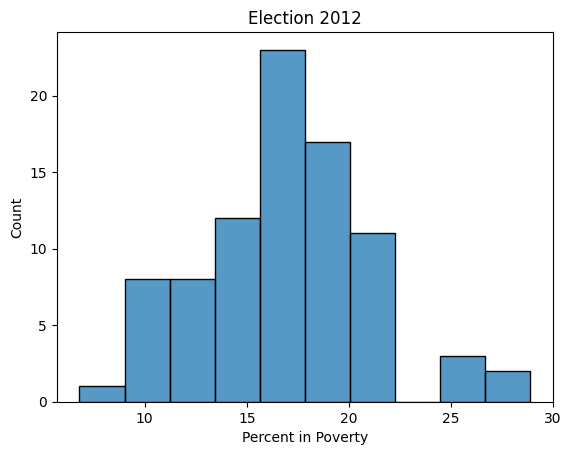

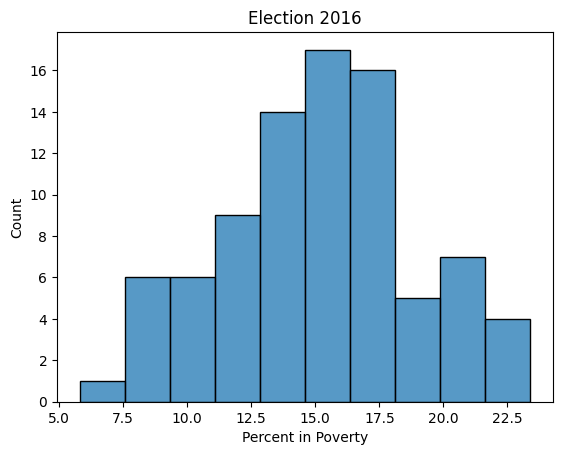

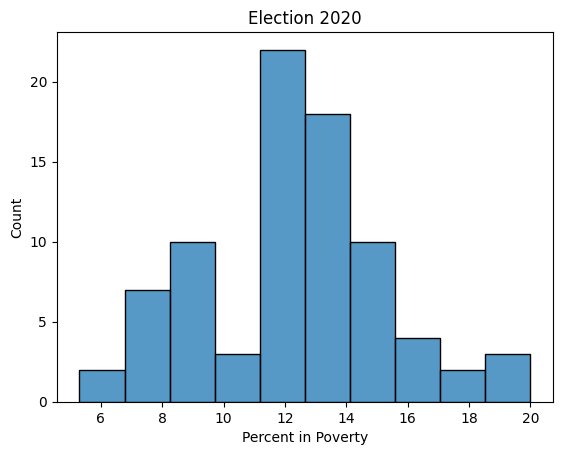

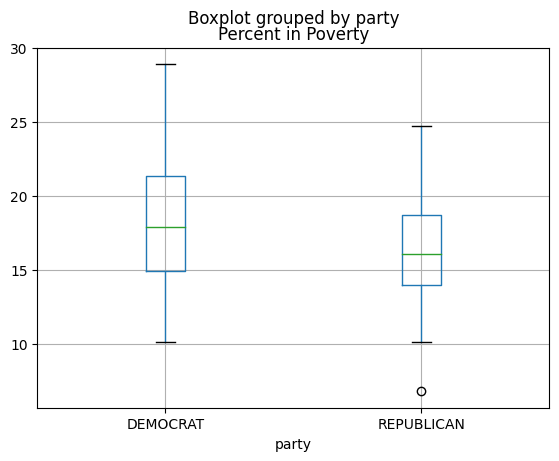

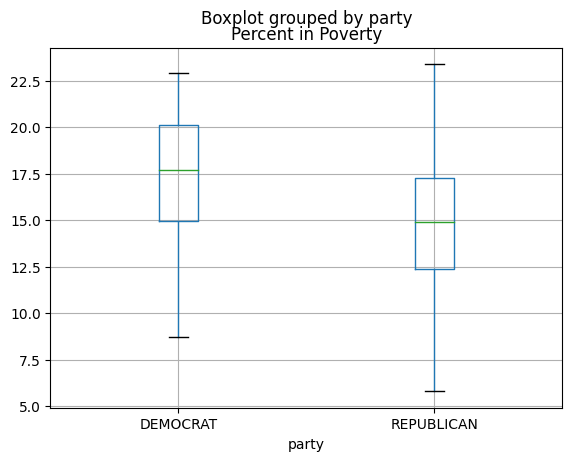

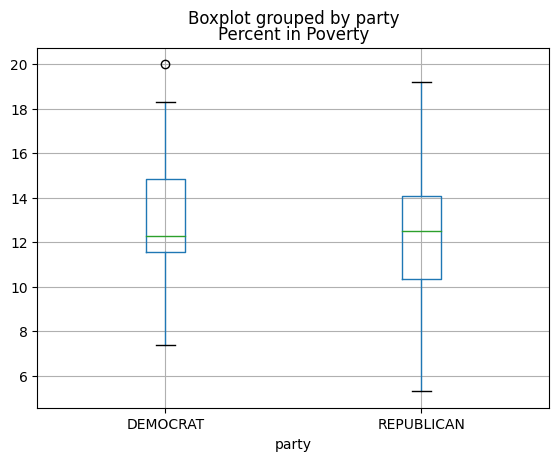

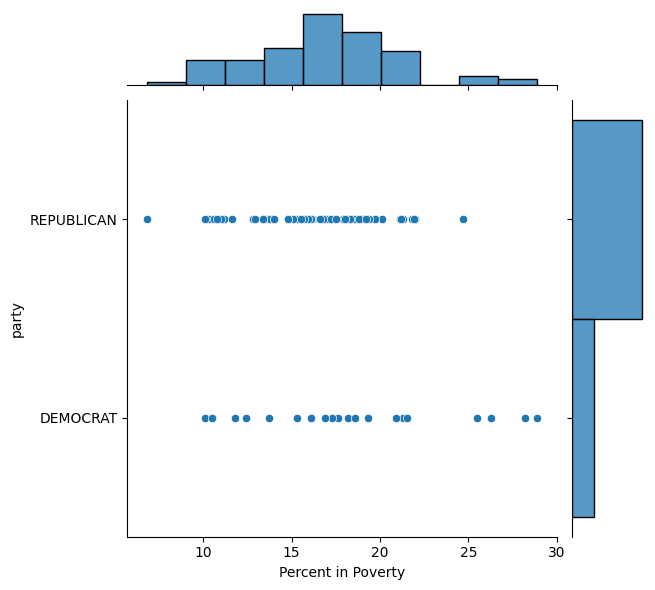

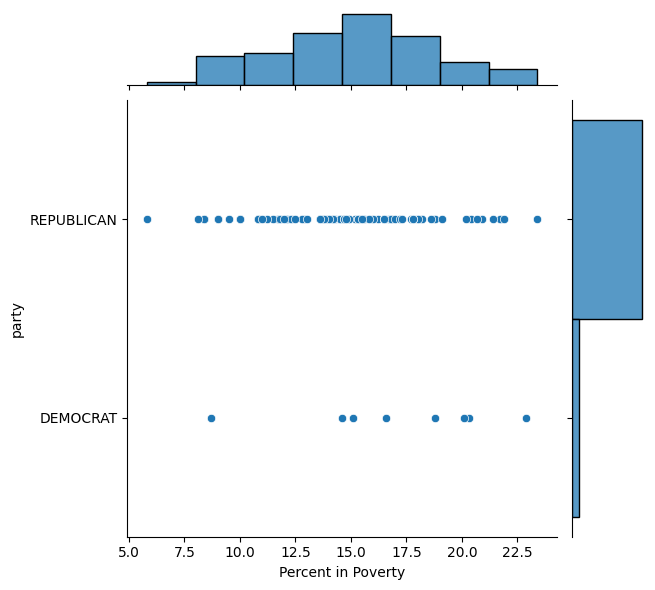

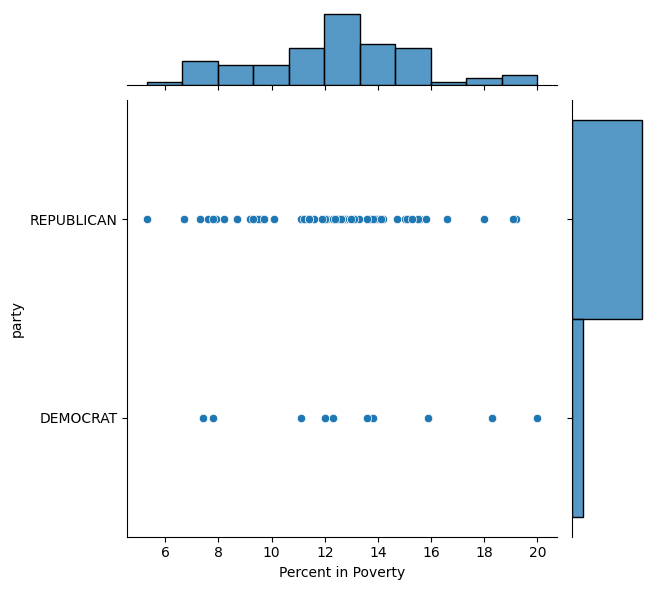

In [22]:
# EDA - Poverty

sns.histplot(election2012['Percent in Poverty'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Percent in Poverty'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Percent in Poverty'], bins = 10, figure=plt.figure()) # Histogram distribution of % in poverty
plt.title('Election 2020')

election2012.boxplot(column = 'Percent in Poverty',by = 'party')
election2016.boxplot(column = 'Percent in Poverty',by = 'party')
election2020.boxplot(column = 'Percent in Poverty',by = 'party') # Boxplot of county poverty rates by voted party

sns.jointplot(x=election2012['Percent in Poverty'],y=election2012['party'])
sns.jointplot(x=election2016['Percent in Poverty'],y=election2016['party'])
sns.jointplot(x=election2020['Percent in Poverty'],y=election2020['party']) # Joint plots (histogram x scatterplot)